Importar librerias

In [2]:
import numpy as np
import os
import re
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from skimage.transform import resize
from skimage.io import imread
import seaborn as sns
from collections import Counter
from skimage import color


# **Punto 1 - Formateo de los datos**

Leyendo directorios y Acondicionando Imagenes (rgb)

In [3]:
dirname = os.path.join(os.getcwd(), '/content/drive/MyDrive/Entregable 3/Images test and train')
imgpath = dirname + os.sep 
size_imag=[150,150,3] # cambiar para cambiar el tamaño de las imagenes para alimentar la maquina
images = []
directories = []
dircount = []
prevRoot=''
cant=0
 
print("leyendo imagenes de: \n")
 
for root, dirnames, filenames in os.walk(imgpath):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            filepath = os.path.join(root, filename)
            image = plt.imread(filepath)
            image_resized = resize (image,size_imag) 
            images.append(image_resized.flatten())
            if prevRoot !=root:
                print(root)
                prevRoot=root
                directories.append(root)
                dircount.append(cant)
                cant=0
            cant=cant+1
dircount.append(cant)
dircount = dircount[1:]
dircount[0]=dircount[0]

print('\nDirectorios leidos:',len(directories))
print("Imagenes en cada directorio", dircount)
print('Total de imagenes:',sum(dircount))

leyendo imagenes de: 

/content/drive/MyDrive/Entregable 3/Images test and train/MuchosAutos 
/content/drive/MyDrive/Entregable 3/Images test and train/PocosAutos 

Directorios leidos: 2
Imagenes en cada directorio [300, 300]
Total de imagenes: 600


Creando los arreglos de atributo (x) y el arreglo de clases (y)

Cantidad etiquetas creadas:  600
clases :  [0 1]
> 0 MuchosAutos 
> 1 PocosAutos 

Distribución de muestras


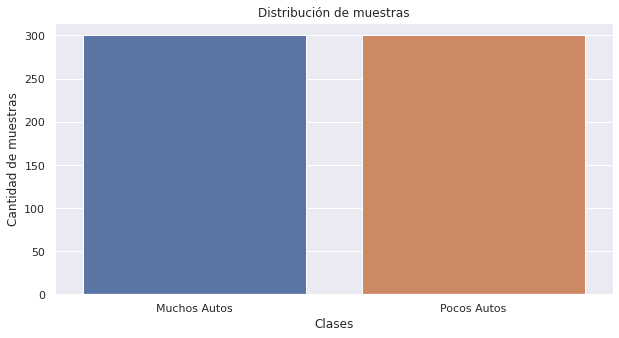

In [4]:
labels=[]
indice=0

for cantidad in dircount:
    for i in range(cantidad):
        labels.append(indice)
    indice=indice+1
print("Cantidad etiquetas creadas: ",len(labels))
y = np.asarray(labels)
x = np.asarray(images)
classes = np.unique(y)
nClasses = len(classes)
print('clases : ', classes)
estado=[]
indice=0
for directorio in directories:
    name = directorio.split(os.sep)
    print(f'> {indice} {name[len(name)-1]}')
    estado.append(name[len(name)-1])
    indice=indice+1
print('\nDistribución de muestras')
sns.set_context('notebook', font_scale=0.9) 
sns.set_theme(style="darkgrid")
plt.figure(figsize=(10,5))
sns.barplot(x=["Muchos Autos","Pocos Autos"],y= dircount).set(title='Distribución de muestras', xlabel='Clases', ylabel='Cantidad de muestras')
plt.show()


Se puede apreciar que el dataset es equilibrado. Hay 300 muestras de imagenes con Muchos Autos, y 300 muetras con Pocos Autos.
El tamaño de imagenes de muetreo se redujo a 150x150, con lo cual se obtiene buen desepeño.
En el Anexo 1, se prueba el clasificador con imagenes del mismo tamaño pero en escala de grises. Y se puede apreciar que se reduce la precisión del claseficador.

# **Punto 2 - Diseño y entrenamiento del SVM**

Distribución de muestras a presentar para entrenar el clasificador:

> Cantidad de imagenes con Muchos Autos:244
> Cantidad de imagenes con Pocos Autos:236

Distribución de muestras a presentar para testear el clasificador:

> Cantidad de imagenes con Muchos Autos:56
> Cantidad de imagenes con Pocos Autos:64



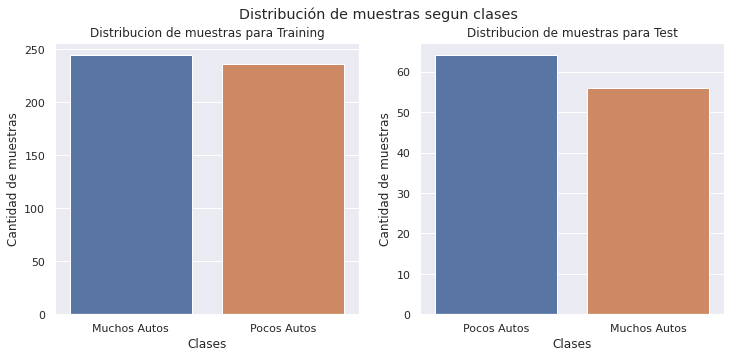


 El modelo del Clasificador con:
 > Tamaño de imagenes en RGB de:[150, 150]
 > Distribución de muestras:0.2
 > gamma: 0.0001

 Obtuvo una precisión media de =  0.9833333333333333 


In [8]:
X = x # Entradas (inputs)
Y = y # Salidas (outputs)
gam = 0.0001 # valor de gamma, con el cual se obtuvo buena precisión
t_size = 0.2 # divisor de arreglos para entrenamiento y testeo

# Dividir el dataset en training y testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = t_size,random_state=0)  # random_state = 0 para congelar el aleatorio


cant_class_train = np.asarray( Counter(Y_train).most_common())
cant_train = np.reshape(cant_class_train[:,1:],(1,2))


print(f'Distribución de muestras a presentar para entrenar el clasificador:\n')
print(f'> Cantidad de imagenes con Muchos Autos:{cant_train[0][0]}')
print(f'> Cantidad de imagenes con Pocos Autos:{cant_train[0][1]}\n')
cant_class_test = np.asarray( Counter(Y_test).most_common())
cant_test = np.reshape(cant_class_test[:,1:],(1,2))

print(f'Distribución de muestras a presentar para testear el clasificador:\n')
print(f'> Cantidad de imagenes con Muchos Autos:{cant_test[0][1]}')
print(f'> Cantidad de imagenes con Pocos Autos:{cant_test[0][0]}\n')

figure,axis = plt.subplots(1,2)
figure.set_size_inches((12,5))
figure.suptitle("Distribución de muestras segun clases")
sns.barplot(x=["Muchos Autos","Pocos Autos"],y=cant_train[0],ax=axis[0]).set(title='Distribucion de muestras para Training', xlabel='Clases', ylabel='Cantidad de muestras')
sns.barplot(x=["Pocos Autos","Muchos Autos"],y=cant_test[0], ax=axis[1]).set(title='Distribucion de muestras para Test', xlabel='Clases', ylabel='Cantidad de muestras')
plt.show()

# Creo el modelo y lo entreno

clf = SVC(gamma = gam,probability = True)
clf.fit(X_train, Y_train)

#Testeo (pruebo el clasificador con datos de testing)

score = clf.score(X_test, Y_test)
print('\n El modelo del Clasificador con:')
print(f' > Tamaño de imagenes en RGB de:{size_imag[:2]}')
print(f' > Distribución de muestras:{t_size}')
print(f' > gamma: {gam}')
print('\n Obtuvo una precisión media de =' , '\033[1m\033[91m' ,score, '\033[0m')


Se puede apreciar que la distribución de las imagenes de entrenamiento y de testeo son bastantes parejas en cuanto a la cantidad de clases.
Por otro lado, se probo con distintos gammas y tamaño de imagen y la mejor precisión que se obtuvo (0.9833...)  fue con los valores seleccionado.

Observacion: 
Mismo tamaño de imagen, misma gamma, pero imagenes a escala de grises. Provoca una disminución en la Precisión del clasificador, como se puede ver en el apartado anexo 1 (prueba del clasificador con muestras de imagenes en escala de grises). Esto puede ser debido a que las imagenes a color cuentan con tres capas (R, G y B) que le otorgan al clasificador mayor cantidad de datos.


# **Punto 4 - Prediciendo los datos**

Distribución de imagenes predichas por el clasificador:

 > Cantidad de imagenes con Muchos Autos:58
 > Cantidad de imagenes con Pocos Autos:62



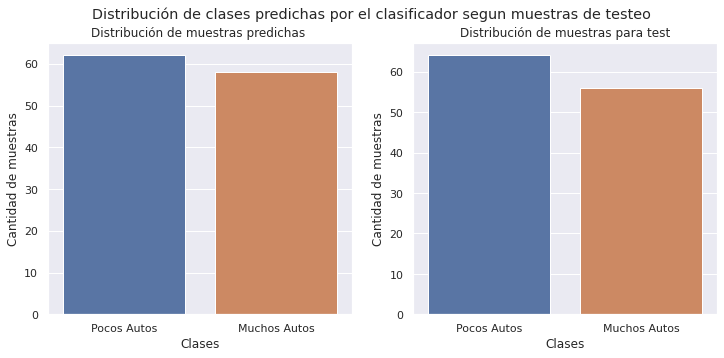


El modelo con:
 > gamma = 0.0001
 > test_size = 0.2
 > exactitud de: 98.33333333333333% 

Predijo mal las siguientes imagenes [ 1 68] provistas para el testeo:

La imagen 1, perteneciente a la clase 1 (Pocos Autos)
 > Se predijo con exactitud que pertenece a la clase: 0

 Con una estimación de:

  > 65.02660095786817% de probabilidad de pertenecer a la categoria Muchos Autos
  > 34.97339904213182% de probabilidad de pertenecer a la categoria Pocos Autos



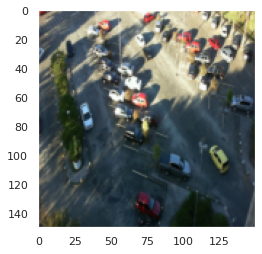


La imagen 68, perteneciente a la clase 1 (Pocos Autos)
 > Se predijo con exactitud que pertenece a la clase: 0

 Con una estimación de:

  > 90.57016686145408% de probabilidad de pertenecer a la categoria Muchos Autos
  > 9.429833138545941% de probabilidad de pertenecer a la categoria Pocos Autos



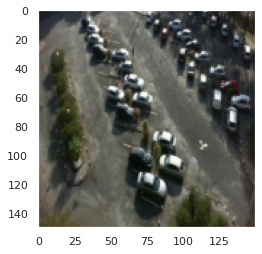

In [11]:

y_pred=clf.predict(X_test) # creo el arreglo con las prediscciones de las imagenes de muestra contenidas en el arreglo de testeo. 


cant_class_pred = np.asarray( Counter(y_pred).most_common())
cant_pred = np.reshape(cant_class_pred[:,1:],(1,2))
print(f'Distribución de imagenes predichas por el clasificador:\n')
print(f' > Cantidad de imagenes con Muchos Autos:{cant_pred[0][1]}')
print(f' > Cantidad de imagenes con Pocos Autos:{cant_pred[0][0]}\n')

figure,axis = plt.subplots(1,2)
figure.set_size_inches((12,5))
figure.suptitle("Distribución de clases predichas por el clasificador segun muestras de testeo")
sns.barplot(x=["Pocos Autos","Muchos Autos"],y=cant_pred[0],ax=axis[0]).set(title='Distribución de muestras predichas ', xlabel='Clases', ylabel='Cantidad de muestras')
sns.barplot(x=["Pocos Autos","Muchos Autos"],y=cant_test[0], ax=axis[1]).set(title='Distribución de muestras para test', xlabel='Clases', ylabel='Cantidad de muestras')
plt.show()


print("\nEl modelo con:")
print(f' > gamma = {gam}')
print(f' > test_size = {t_size}') 
print(f' > exactitud de: {accuracy_score(y_pred,Y_test)*100}% ')
complemento = np.where((y_pred == Y_test) == False)
print(f"\nPredijo mal las siguientes imagenes {complemento[0]+1} provistas para el testeo:")

probability = clf.predict_proba(X_test) # creo el arreglo de probabilidad de clases para cada muestra

for i in complemento[0]:
    if Y_test[i]==0:
      print(f'\nLa imagen {i+1}, perteneciente a la clase {Y_test[i]} (Muchos Autos)')
    else:
      print(f'\nLa imagen {i+1}, perteneciente a la clase {Y_test[i]} (Pocos Autos)')
    print(f' > Se predijo con exactitud que pertenece a la clase: {y_pred[i]}\n')
    print(' Con una estimación de:\n')
    print(f'  > {(probability[i][0])*100}% de probabilidad de pertenecer a la categoria Muchos Autos')
    print(f'  > {(probability[i][1])*100}% de probabilidad de pertenecer a la categoria Pocos Autos\n')
 
    plt.grid()
    plt.imshow(X_test[i].reshape(size_imag), cmap=plt.cm.binary)
    plt.show()


Se puede observar que el clasificador, de las imagenes de muestra que entraron en el porcentaje de falla, el metodo predict() le asigno la clase 0 (Muchos Autos) con una probabilidad, de que sea esa clase muy alta aprox. 65% para la imagen 1 y 90% para la imagen 68.
Por otra parte, se puede ver que el metodo predict() y predict_proba() coincidieron unanime en que las imagenes 1 y 68 pertenecen a la clase 0 al predecirlas.

# **Punto 3 - matriz confusión**

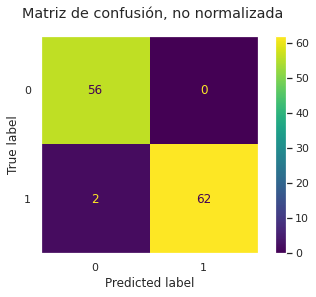

In [12]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(Y_test, y_pred)
disp.figure_.suptitle('Matriz de confusión, no normalizada')
plt.grid()
plt.show()

Se puede apreciar que se produjeron 2 falsas clasificaciones. Se predijeron como imagenes pertenecientes a la clase 0 (Muchos Autos), cuando en realidad pertenecian a la clase 1 (Pocos Auto).
Se clasificaron correctamente el 100% de las (56) imagenes pertenecientes a la clase 0 (Muchos Autos).
Y 62 imagenes de muestra de la clase 1 (Pocos Autos) se clasificaron correctamente.

Por otro lado, se puede ver que el error mas probable es que prediga una muestra perteneciente a la clase 1 (Pocos Autos) con la clase 0 (Muchos Autos). Que es lo que paso en el apartado anterior que dio como resultado dos imagenes de la clase 1 predicha como clase 0.

Este comportamiento puede ser debido a que se entreno el clasificador con mas imagenes (244 imgenes) de la clase 0 (muchos Autos), contra (236 imagenes) de la clase 1 (Pocos Autos), por lo que seria conveniente entrenar con mas imagenes de la clase 1.

# **Punto 5 - Función**

"El estacionamiento se encuentra casi lleno"
 con una probabilidad de: 88.36797324533202%

Imagen del estacionamiento: 



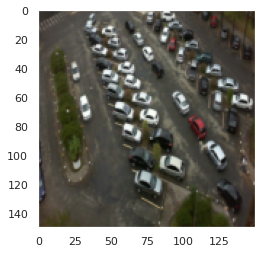

In [17]:
# ruta de la imagen ue se debe cambiar en caso de testear otra imagen

ruta_image = '/content/drive/MyDrive/Entregable 3/Imagenes a probar/2013-04-12_14_45_09.jpg' 


def prediccion (ruta):
  
  #cargo la imagen desde la ruta especificada en "ruta" y la acondiciono para la prediccion
  image = plt.imread(ruta)
  image_resized = resize (image,size_imag) 
  image_resized.flatten()
  mat = np.asarray(image_resized.flatten())
  
  # presento la imagen acondicionada al clasificador "clf" para que prediga 
  pred = clf.predict(mat.reshape(1,-1))
  probability=clf.predict_proba(mat.reshape(1,-1))
  
  # muestro resultado segun la prediccion
  if pred[0] == 1:
    print('\033[1m\033[92m''"El estacionamiento cuenta con varios lujares disponibles"''\033[0m')
    print (f' con una probabilidad de: {probability[0][1]*100}%')
  else:
    print('\033[1m\033[91m''"El estacionamiento se encuentra casi lleno"''\033[0m')
    print (f' con una probabilidad de: {probability[0][0]*100}%')
  print('\nImagen del estacionamiento: \n')
  
  plt.grid()
  plt.imshow(mat.reshape(size_imag))
  plt.show()
  return

# llamo a la funcion prediccion envio como parametro la ruta de la imagen
prediccion(ruta_image) 



Por las imagenes testeadas y la probabilidad que arroja el clasificador, se puede decir que esta clasificando correctamente las imagenes presentadas.

# **Punto 6 KMeans**

Si es factible usar otro clasificador (pero clasificador).
En este caso, nose si seria necesario, ya que, el dataset esta bastante bien organizado. Es decir, esta equilibrado en cuanto a la cantidad de imagenes que posee cada una de las clases ( Muchos Autos, Pocos Autos). Ademas, es bastante secillo de clasificarlas.

Si se implementaria una maquina KMeans, seria inadecuada, porque es una maquina de agrupamiento y no de clasificación, usada cuando no se conoce la clase a la que pertenece la muestra, que no es nuestro caso.
Para implementarla, para clasificación, primero se tendria que utilizar, como bien dice el enunciado, dos clusteres, ya que, mas de dos seria inecesario porque no tendrian muestras para asignarles o seria un subgrupo al cual tendria que decidir si pertenece a la clase 0 (Muchos Autos) o a la clase 1 (Pocos Autos). Con los dos clusteres, vamos a tener dos centroides a los que vamos a tener que asignarle una clase que represente a los miembros de ese cluster y luego convertir este problema de agrupamiento en uno de clasificación, para clasificar una nueva muestra.


A continuacion se presenta el codigo de implementacion del clasificador KMeans con:
* Igual distribución de muestras para entrenamiento y testeo. Que las utilizadas para SVM , a modo de comparar los resultados.
* 2 Clusters para asignarle Clase 0 (Muchos Autos) y clase 1 (Pocos Autos)

cluster 0 (Muchos Autos)
200 elementos


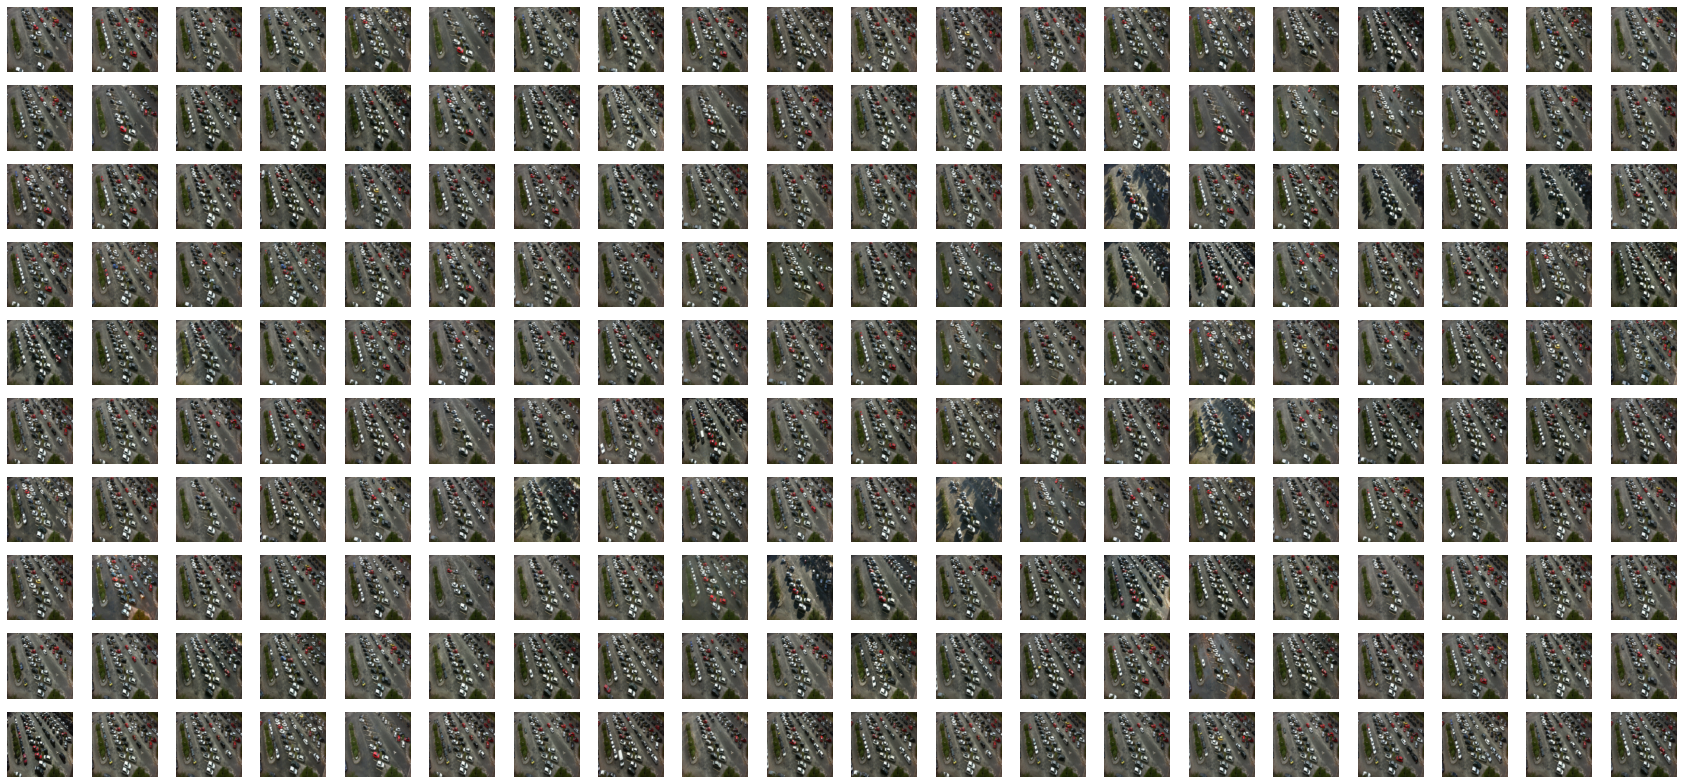

cluster 1 (Pocos Autos)
280 elementos


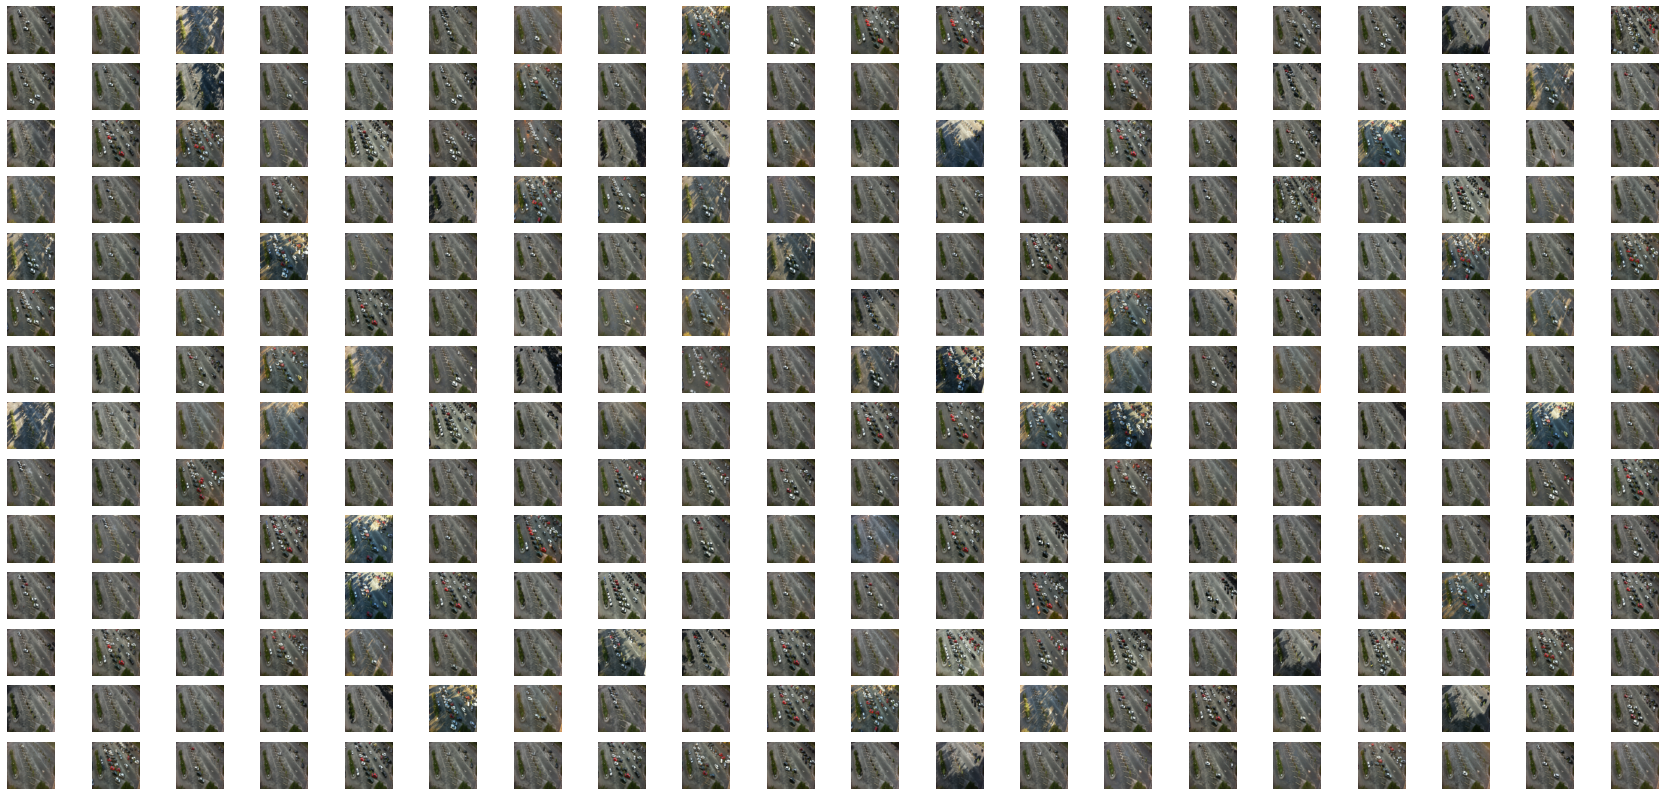

Distribución de muestras a presentadas para tester el clasificador:

 > Cantidad de imagenes con Muchos Autos:56
 > Cantidad de imagenes con Pocos Autos:64

Distribución de muestras clasificadas por el clasificador:

 > Cantidad de imagenes con Muchos Autos:51
 > Cantidad de imagenes con Pocos Autos:69



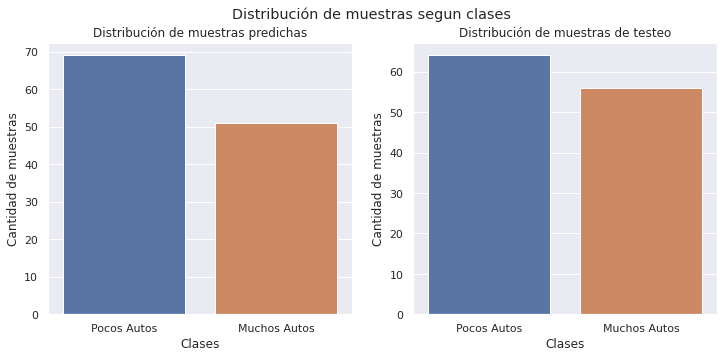

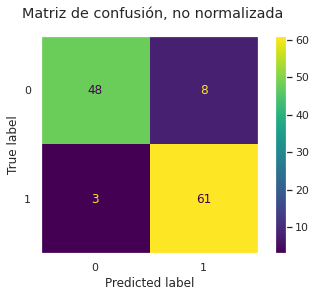


Predijo mal las imagenes [ 27  35  45  68  71  82  90 100 104 110 113] provistas para el testeo:
cluster 0 (Muchos Autos)
51 elementos


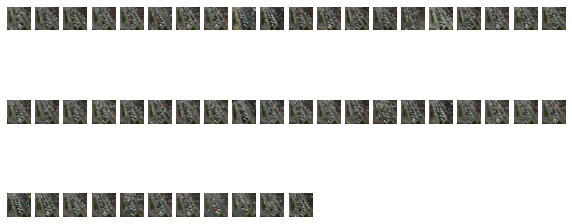

cluster 1 (Pocos Autos)
69 elementos


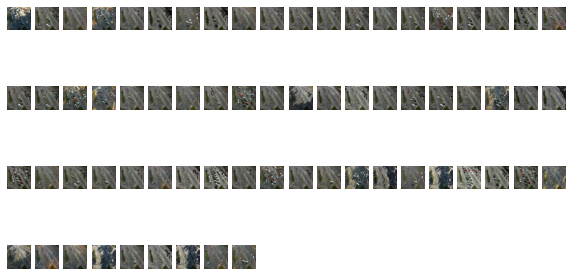

In [21]:
from sklearn.cluster import KMeans
clase = ["Muchos Autos","Pocos Autos"]
np.random.seed(1)
n = 2 # numeros de clusters

# defino el objeto KMeams y lo entreno
kmeans = KMeans(n_clusters=n,init='random', random_state=0)
kmeans.fit(X_train)
Z = kmeans.predict(X_train) #obtengo la clasificacion

for i in range(0,n):

    fila = np.where(Z==i)[0] # filas en Z donde están las imagenes de cada cluster
    num = fila.shape[0]      # numero imagenes de cada cluster
    r = np.floor(num/10.)    # numero de filas menos 1 en figura de salida 

    print("cluster "+str(i)+" "+"("+clase[i]+")")
    print(str(num)+" elementos")

    plt.figure(figsize=(30,30))
    for k in range(0, num):
        plt.subplot(r+1,20, k+1)
        imagen = X_train[fila[k], ]
        imagen = imagen.reshape(150, 150,3)
        plt.imshow(imagen, cmap=plt.cm.gray)
        plt.axis('off')
    plt.show()

# le entrego las misma muestras de testeo que le entrege a al clasificador SVM, para que las prediga 
Z_pred= kmeans.predict(X_test) 


cant_class_test = np.asarray( Counter(Y_test).most_common())
cant_test = np.reshape(cant_class_test[:,1:],(1,2))
print(f'Distribución de muestras a presentadas para tester el clasificador:\n')
print(f' > Cantidad de imagenes con Muchos Autos:{cant_test[0][1]}')
print(f' > Cantidad de imagenes con Pocos Autos:{cant_test[0][0]}\n')
cant_class_Z_pred = np.asarray( Counter(Z_pred).most_common())
cant_Z_pred = np.reshape(cant_class_Z_pred[:,1:],(1,2))
print(f'Distribución de muestras clasificadas por el clasificador:\n')
print(f' > Cantidad de imagenes con Muchos Autos:{cant_Z_pred[0][1]}')
print(f' > Cantidad de imagenes con Pocos Autos:{cant_Z_pred[0][0]}\n')


figure,axis = plt.subplots(1,2)
figure.set_size_inches((12,5))
figure.suptitle("Distribución de muestras segun clases")
sns.barplot(x=["Pocos Autos","Muchos Autos",],y=cant_Z_pred[0],ax=axis[0]).set(title='Distribución de muestras predichas', xlabel='Clases', ylabel='Cantidad de muestras')
sns.barplot(x=["Pocos Autos","Muchos Autos",],y=cant_test[0], ax=axis[1]).set(title='Distribución de muestras de testeo', xlabel='Clases', ylabel='Cantidad de muestras')
plt.show()


disp = metrics.ConfusionMatrixDisplay.from_predictions(Y_test,Z_pred)
disp.figure_.suptitle('Matriz de confusión, no normalizada')
plt.grid()
plt.show()

complemento = np.where((Z_pred == Y_test) == False)
print(f"\nPredijo mal las imagenes {complemento[0]+1} provistas para el testeo:")

for i in range(0,n):

    fila = np.where(Z_pred==i)[0] # filas en Z donde están las imagenes de cada cluster
    num = fila.shape[0]      # numero imagenes de cada cluster
    r = np.floor(num/10.)    # numero de filas menos 1 en figura de salida 

    print("cluster "+str(i)+" "+"("+clase[i]+")")
    print(str(num)+" elementos")

    plt.figure(figsize=(10,10))
    for k in range(0, num):
        plt.subplot(r+1,20, k+1)
        imagen = X_test[fila[k], ]
        imagen = imagen.reshape(150, 150,3)
        plt.imshow(imagen, cmap=plt.cm.gray)
        plt.axis('off')
    plt.show()

Al ejecutar el codigo de KMeans se observa que, a igual condiciones de muestras para entrenamiento y testeo, se produjo mas errores en la predicción. 
(Por falta de tiempo no se realizo un detalle mas exhaustivo,se podria haber testeado con distinto tamaño de imagen y en escala de grises) 

--------------------------
--------------------------




**Anexo 1 Mismo clasificador SVM con los mismos parametros pero con muestra de imagenes en escala de Grises**

---



---



Leyendo directorios y acondicionando las imagenes en escala de grises

In [22]:
dirname = os.path.join(os.getcwd(), '/content/drive/MyDrive/Entregable 3/Images test and train')
imgpath = dirname + os.sep 
size_imag=[150,150] # cambiar para cambiar el tamaño de las imagenes para alimentar a el clasificador 
images = []
directories = []
dircount = []
prevRoot=''
cant=0
 
print("leyendo imagenes de: ")
 
for root, dirnames, filenames in os.walk(imgpath):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            filepath = os.path.join(root, filename)
            image = plt.imread(filepath)
            imgGray = color.rgb2gray(image)
            image_resized = resize (imgGray,size_imag)
            images.append(image_resized.flatten())
            if prevRoot !=root:
                print(root)
                prevRoot=root
                directories.append(root)
                dircount.append(cant)
                cant=0
            cant=cant+1
dircount.append(cant)
dircount = dircount[1:]
dircount[0]=dircount[0]

print('Directorios leidos:',len(directories))
print("Imagenes en cada directorio", dircount)
print('Total de imagenes:',sum(dircount))

leyendo imagenes de: 
/content/drive/MyDrive/Entregable 3/Images test and train/MuchosAutos 
/content/drive/MyDrive/Entregable 3/Images test and train/PocosAutos 
Directorios leidos: 2
Imagenes en cada directorio [300, 300]
Total de imagenes: 600


Creando lo arreglos de atributo (x) y de clases (y)

Cantidad etiquetas creadas:  600
Clases :  [0 1]
0 MuchosAutos 
1 PocosAutos 
Distribución de muestras


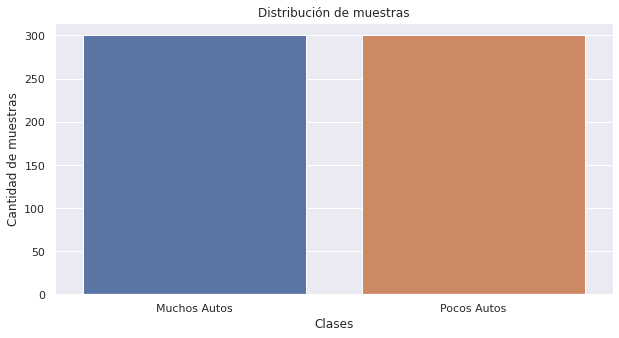

In [23]:
labels=[]
indice=0

for cantidad in dircount:
    for i in range(cantidad):
        labels.append(indice)
    indice=indice+1
print("Cantidad etiquetas creadas: ",len(labels))

y = np.asarray(labels)
x = np.asarray(images) 
classes = np.unique(y)
nClasses = len(classes)
print('Clases : ', classes)
estado=[]
indice=0
for directorio in directories:
    name = directorio.split(os.sep)
    print(indice , name[len(name)-1])
    estado.append(name[len(name)-1])
    indice=indice+1
 
print('Distribución de muestras')
sns.set_context('notebook', font_scale=0.9) # Configura el diseño de acuerdo a donde se mostrará. Puede ser 'paper', 'notebook', 'talk' o 'poster'
sns.set_theme(style="darkgrid")
plt.figure(figsize=(10,5))
sns.barplot(x=["Muchos Autos","Pocos Autos"],y= dircount).set(title='Distribución de muestras', xlabel='Clases', ylabel='Cantidad de muestras')
plt.show()

Entrenando la maquina

Distribución de muestras a presentar para entrenar el clasificador:

> Cantidad de imagenes con Muchos Autos:244
> Cantidad de imagenes con Pocos Autos:236

Distribución de muestras a presentar para tester el clasificador:

> Cantidad de imagenes con Muchos Autos:56
> Cantidad de imagenes con Pocos Autos:64



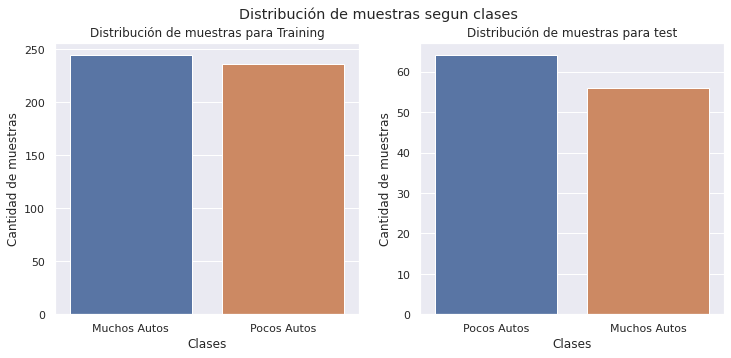


 El modelo del Clasificador con:
 > Tamaño de imagenes en RGB de:[150, 150]
 > Distribución de muestras:0.2
 > gamma: 0.0001

 Obtuvo una precisión media de =  0.9666666666666667 


In [26]:
X = x # Entradas (inputs)
Y = y # Salidas (outputs)

gam=0.0001 # variable para cambiar el gamma del clasificador
t_size=0.2 # variable para cambiar la relacion del dataset (entrenamiento/testeo)

# Dividir el dataset en training y testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = t_size,random_state=0)  # random_state = 0 para congelar el aleatorio


cant_class_train = np.asarray( Counter(Y_train).most_common())
cant_train = np.reshape(cant_class_train[:,1:],(1,2))


print(f'Distribución de muestras a presentar para entrenar el clasificador:\n')
print(f'> Cantidad de imagenes con Muchos Autos:{cant_train[0][0]}')
print(f'> Cantidad de imagenes con Pocos Autos:{cant_train[0][1]}\n')
cant_class_test = np.asarray( Counter(Y_test).most_common())
cant_test = np.reshape(cant_class_test[:,1:],(1,2))

print(f'Distribución de muestras a presentar para tester el clasificador:\n')
print(f'> Cantidad de imagenes con Muchos Autos:{cant_test[0][1]}')
print(f'> Cantidad de imagenes con Pocos Autos:{cant_test[0][0]}\n')

figure,axis = plt.subplots(1,2)
figure.set_size_inches((12,5))
figure.suptitle("Distribución de muestras segun clases")
sns.barplot(x=["Muchos Autos","Pocos Autos"],y=cant_train[0],ax=axis[0]).set(title='Distribución de muestras para Training', xlabel='Clases', ylabel='Cantidad de muestras')
sns.barplot(x=["Pocos Autos","Muchos Autos"],y=cant_test[0], ax=axis[1]).set(title='Distribución de muestras para test', xlabel='Clases', ylabel='Cantidad de muestras')
plt.show()

# Creo el modelo y lo entreno

clf = SVC(gamma = gam,probability = True)
clf.fit(X_train, Y_train)

#Testeo (pruebo el clasificador con datos de testing)
score = clf.score(X_test, Y_test)
print('\n El modelo del Clasificador con:')
print(f' > Tamaño de imagenes en RGB de:{size_imag[:]}')
print(f' > Distribución de muestras:{t_size}')
print(f' > gamma: {gam}')
print('\n Obtuvo una precisión media de =' , '\033[1m\033[91m' ,score, '\033[0m')


Se puede apreciar que a igual tamaño de imagen, igual distibución de muestra para entrenamiento y testeo, se obtiene una precisión mas pobre (0.96...) en imagenes en escala de grises, que de la que se obtiene con imagenes en RGB (precision: 0.98333...).
 

prediciendo

Distribución de imagenes predichas por el clasificador:

> Cantidad de imagenes con Muchos Autos:54
> Cantidad de imagenes con Pocos Autos:66



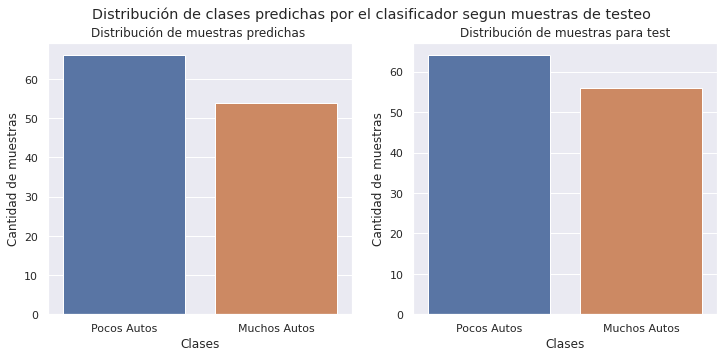


El modelo con:

 > gamma = 0.0001
 > test_size = 0.2
 > exactitud de: 96.66666666666667% 

Predijo mal las siguientes imagenes [ 27  35  68 100] provistas para el testeo:

La imagen 27, perteneciente a la clase 0 (Muchos Autos)
 > Se predijo con exactitud que pertenece a la clase: 1

 Con una estimacion de:

 > 66.34323621655054% de probabilidad de perteneser a la categoria Muchos Autos
 > 33.656763783449456% de probabilidad de perteneser a la categoria Pocos Autos



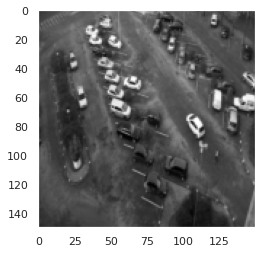


La imagen 35, perteneciente a la clase 0 (Muchos Autos)
 > Se predijo con exactitud que pertenece a la clase: 1

 Con una estimacion de:

 > 70.97532156157888% de probabilidad de perteneser a la categoria Muchos Autos
 > 29.024678438421102% de probabilidad de perteneser a la categoria Pocos Autos



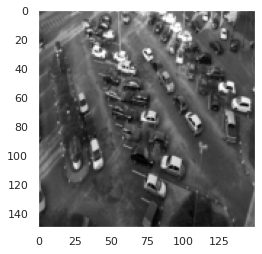


La imagen 68, perteneciente a la clase 1 (Pocos Autos)
 > Se predijo con exactitud que pertenece a la clase: 0

 Con una estimacion de:

 > 92.93407518515639% de probabilidad de perteneser a la categoria Muchos Autos
 > 7.065924814843617% de probabilidad de perteneser a la categoria Pocos Autos



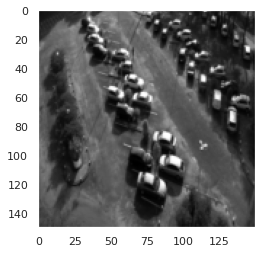


La imagen 100, perteneciente a la clase 0 (Muchos Autos)
 > Se predijo con exactitud que pertenece a la clase: 1

 Con una estimacion de:

 > 71.95271520506209% de probabilidad de perteneser a la categoria Muchos Autos
 > 28.047284794937926% de probabilidad de perteneser a la categoria Pocos Autos



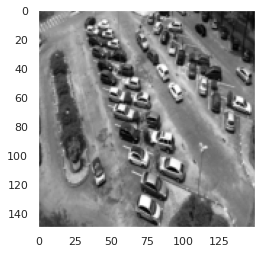

In [28]:
y_pred=clf.predict(X_test)

cant_class_pred = np.asarray( Counter(y_pred).most_common())
cant_pred = np.reshape(cant_class_pred[:,1:],(1,2))
print(f'Distribución de imagenes predichas por el clasificador:\n')
print(f'> Cantidad de imagenes con Muchos Autos:{cant_pred[0][1]}')
print(f'> Cantidad de imagenes con Pocos Autos:{cant_pred[0][0]}\n')

figure,axis = plt.subplots(1,2)
figure.set_size_inches((12,5))
figure.suptitle("Distribución de clases predichas por el clasificador segun muestras de testeo")
sns.barplot(x=["Pocos Autos","Muchos Autos"],y=cant_pred[0],ax=axis[0]).set(title='Distribución de muestras predichas ', xlabel='Clases', ylabel='Cantidad de muestras')
sns.barplot(x=["Pocos Autos","Muchos Autos"],y=cant_test[0], ax=axis[1]).set(title='Distribución de muestras para test', xlabel='Clases', ylabel='Cantidad de muestras')
plt.show()

print("\nEl modelo con:\n")
print(f' > gamma = {gam}')
print(f' > test_size = {t_size}') 
print(f' > exactitud de: {accuracy_score(y_pred,Y_test)*100}% ')
complemento = np.where((y_pred == Y_test) == False)
print(f"\nPredijo mal las siguientes imagenes {complemento[0]+1} provistas para el testeo:")

probability = clf.predict_proba(X_test)

for i in complemento[0]:
    if Y_test[i]==0:
      print(f'\nLa imagen {i+1}, perteneciente a la clase {Y_test[i]} (Muchos Autos)')
    else:
      print(f'\nLa imagen {i+1}, perteneciente a la clase {Y_test[i]} (Pocos Autos)')
    print(f' > Se predijo con exactitud que pertenece a la clase: {y_pred[i]}\n')
    print(' Con una estimacion de:\n')
    print(f' > {(probability[i][0])*100}% de probabilidad de perteneser a la categoria Muchos Autos')
    print(f' > {(probability[i][1])*100}% de probabilidad de perteneser a la categoria Pocos Autos\n')
   
    plt.grid()
    plt.imshow(X_test[i].reshape(size_imag), cmap='gray')
    plt.show()


De los resultados obtenidos se puede apreciar que el clasificador, de las muestras de imagenes que se a confundido en asignarle una clase, solo el metodo predict y el predict_probe a coicidido unanimemente en la imagen 68, la cual esta mas definida, es decir ni muy lavada como la imagen 100 ni muy oscura como las demas.
Ademas,sacando la imagen 68, en las demas, el metodo predict erro y el metodo predict_probe en su probabilidad acerto con la clase a la que pertenecia la imagen. 

Matriz de comfusion

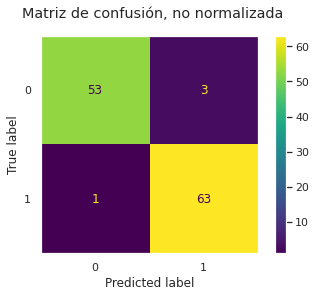

In [29]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(Y_test, y_pred)
disp.figure_.suptitle('Matriz de confusión, no normalizada')
plt.grid()
plt.show()

Se puede aprecia que, de las imagenes de la clase 1 se predijo mal solo una. Mientras que, de las imagenes pertenecientes a la clase 0 se predijeron 3 mal.
Tambien podemos observar que, el clasificador tiene una tendencia en clasificar imagenes de la clase 0 (muchos autos) como clase 1 (pocos autos). Esto se salvaria entrenando con un poco mas de imagenes de la case 1 (Pocos Autos).

Funcion

"El estacionamiento se encuentra casi lleno"
 con una probabilidad de: 91.76496525955852%

Imagen del estacionamiento: 



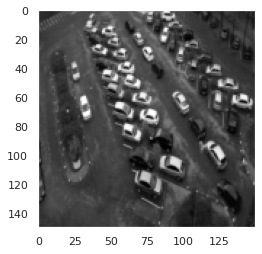

In [34]:
# ruta de la imagen que se debe cambiar en caso de testear otra imagen
ruta_image = '/content/drive/MyDrive/Entregable 3/Imagenes a probar/2013-04-12_14_45_09.jpg' 


def prediccion (ruta):
  
  #cargo la imagen desde la ruta espeificada en "ruta" y la acondiciono para la prediccion
  image = plt.imread(ruta)
  imgGray = color.rgb2gray(image)
  image_resized = resize (imgGray,size_imag)
  image_resized.flatten()
  mat = np.asarray(image_resized.flatten())
  
  # presento la imagen acondicionada a la maquina "clf" para que prediga 
  pred = clf.predict(mat.reshape(1,-1))
  probability=clf.predict_proba(mat.reshape(1,-1))
  
  # muestro resultado segun la prdiccion
  if pred[0] == 1:
    print('\033[1m\033[92m''"El estacionamiento cuenta con varios lujares disponibles"''\033[0m')
    print (f' con una probabilidad de: {probability[0][1]*100}%')
  else:
    print('\033[1m\033[91m''"El estacionamiento se encuentra casi lleno"''\033[0m')
    print (f' con una probabilidad de: {probability[0][0]*100}%')
  print('\nImagen del estacionamiento: \n')
  plt.grid()
  plt.imshow(mat.reshape(size_imag), cmap='gray')
  plt.show() 
  return

# llamo a la funcion prediccion envio como parametro la ruta de la imagen
prediccion(ruta_image) 
